In [153]:
# current date, for retrieving data from proper location.
year = "2023"
month = "December"
day = "8"

## Imports and initialization

In [154]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [155]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

# Today's Work

In [156]:
atomlocs = [2, 2, 3, 3, 1]

In [157]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

In [158]:
reloadMyModules(8)
reload(lac)

fileId = 4
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,load_one_err, U0=0.5e-3, T0=30e-6,alpha_guess=135e-6,num_points = num_points,plot=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 

fig,ax = plt.subplots(1, figsize=[15,7])
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


# ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
#             markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,load_one_err, U0=.5e-3, T0=30e-6,alpha_guess=135e-6,num_points = num_points,plot=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'D2 2-1 Non-retro $ \Delta = 175 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

TypeError: beta_fit_guess() got multiple values for argument 'U0'

<Figure size 30000x9600 with 0 Axes>

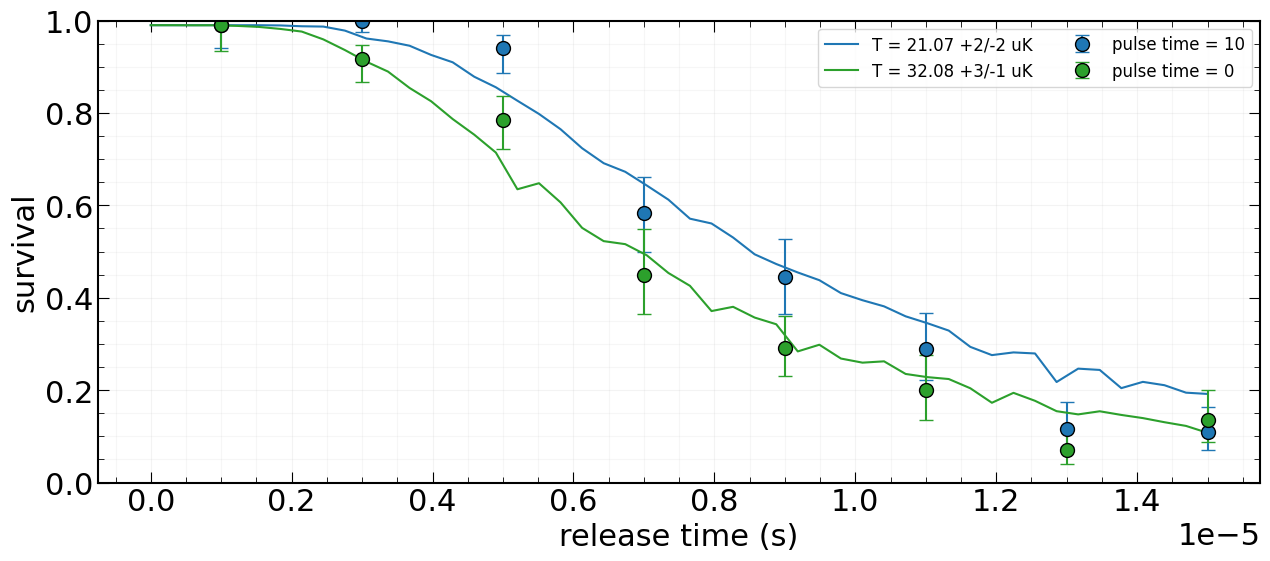

In [70]:
reload(ah)
fileId = 6
threshold = 60

dataset1 = ta.standardTransferAnalysis(7, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(6, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(0,max(key1),100)
temp_guess = 30e-6
trap_depth = .5e-3
avgTferData1[0]=.99
avgTferData1[3]=.45
avgTferData1[5]=.2
avgTferData2[0]=.99
ax.errorbar(key1*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',
            markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='pulse time = 10')

ah.releaseRecaptureTemp(key2,avgTferData2,err2,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',
            markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='pulse time = 0')
ah.releaseRecaptureTemp(key1,avgTferData1,err1,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)


ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="x")

<Figure size 30000x9600 with 0 Axes>

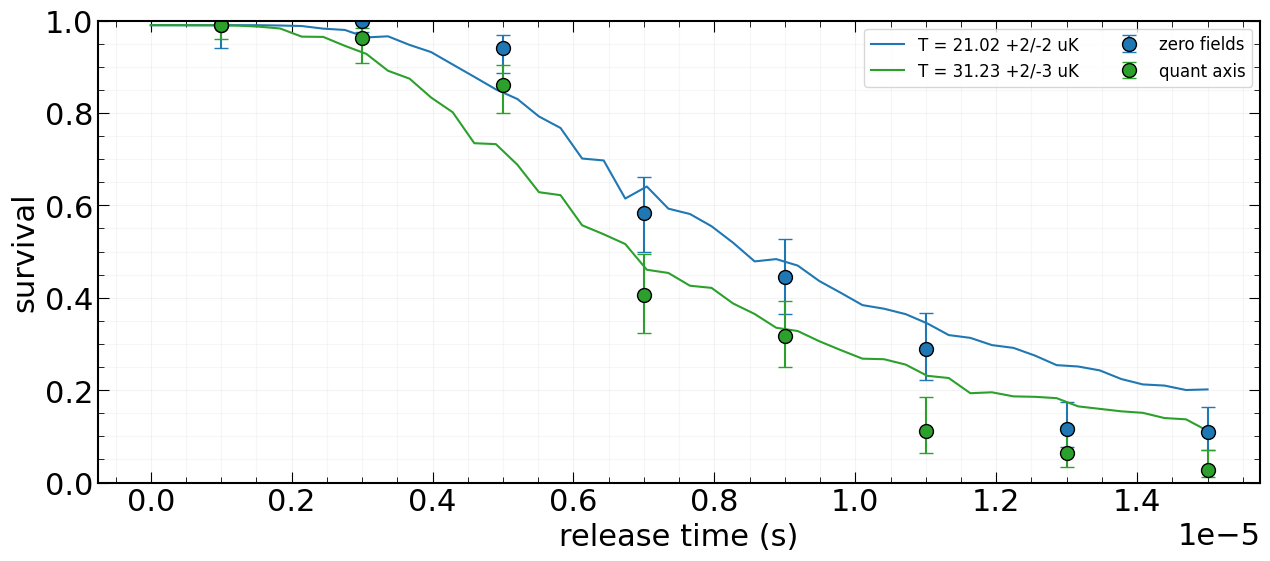

In [69]:
reload(ah)
fileId = 6
threshold = 60

dataset1 = ta.standardTransferAnalysis(9, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(6, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(0,max(key1),100)
temp_guess = 30e-6
trap_depth = .5e-3
avgTferData1[0]=.99
# avgTferData1[3]=.45
# avgTferData1[5]=.2
avgTferData2[0]=.99
ax.errorbar(key1*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',
            markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='zero fields')
ah.releaseRecaptureTemp(key2,avgTferData2,err2,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',
            markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='quant axis')
ah.releaseRecaptureTemp(key1,avgTferData1,err1,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)





ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="x")

<Figure size 30000x9600 with 0 Axes>

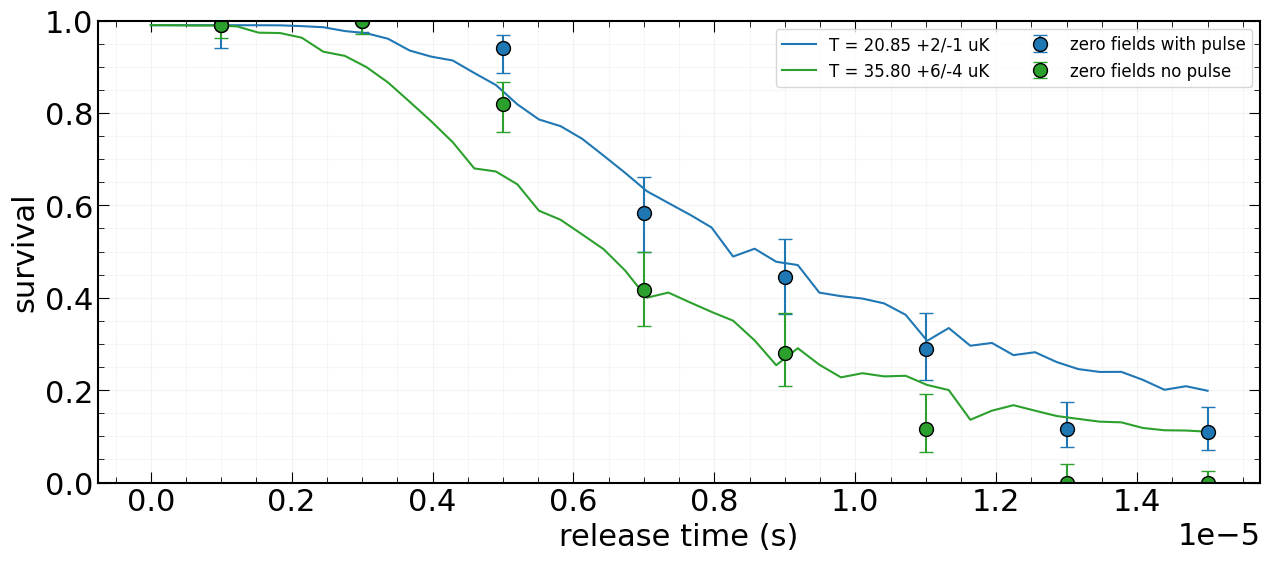

In [71]:
reload(ah)
threshold = 60

dataset1 = ta.standardTransferAnalysis(10, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(6, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(0,max(key1),100)
temp_guess = 30e-6
trap_depth = .5e-3
avgTferData1[0]=.99
# avgTferData1[3]=.45
# avgTferData1[5]=.2
avgTferData2[0]=.99

ax.errorbar(key1*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',
            markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='zero fields with pulse')

ah.releaseRecaptureTemp(key2,avgTferData2,err2,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',
            markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='zero fields no pulse')
ah.releaseRecaptureTemp(key1,avgTferData1,err1,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)



ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="x")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



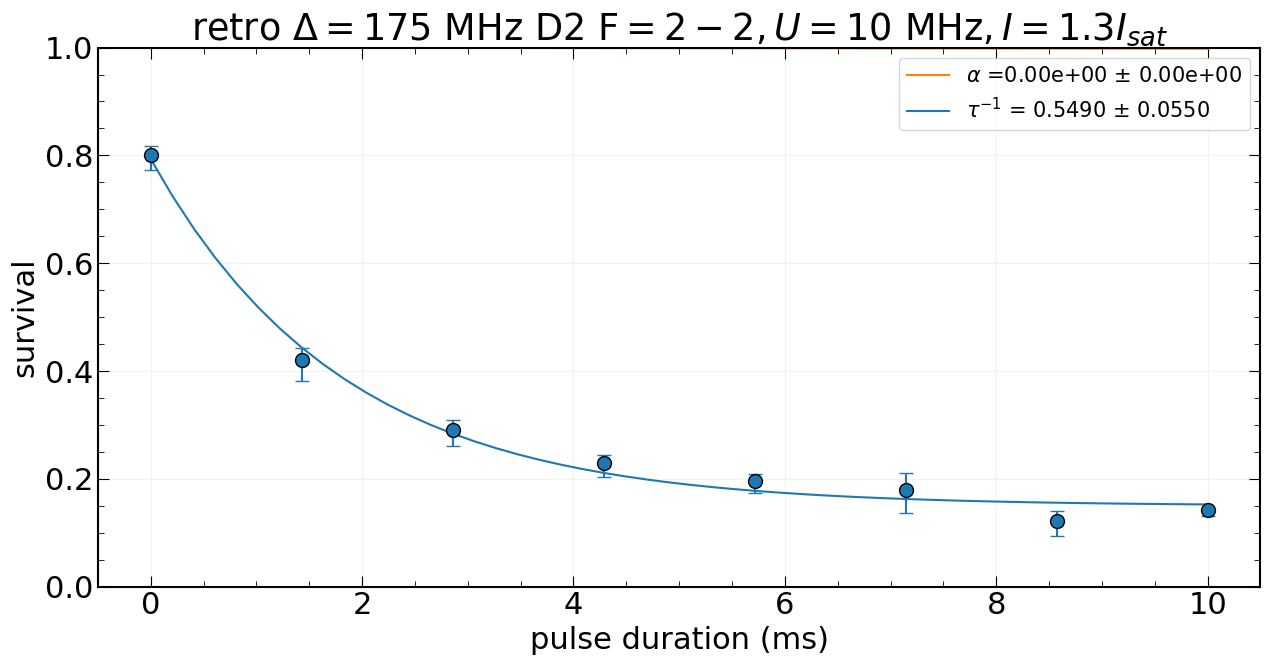

In [84]:
reloadMyModules(8)

fileId = 12
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[1] = 0.42
num_points = 50
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,load_one_err, U0=0.5e-3, T0=30e-6,alpha_guess=135e-6,num_points = num_points,plot=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 

fig,ax = plt.subplots(1, figsize=[15,7])
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


# ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
#             markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,load_one_err, U0=.5e-3, T0=30e-6,alpha_guess=135e-6,num_points = num_points,plot=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro $ \Delta = 175 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

### File 30 (2_0_rate_measurement):  

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 14:21:8: on (Y-M-D) 2023-12-11, And ended at 14:27:22: on 2023-12-11
Experiment Notes:  



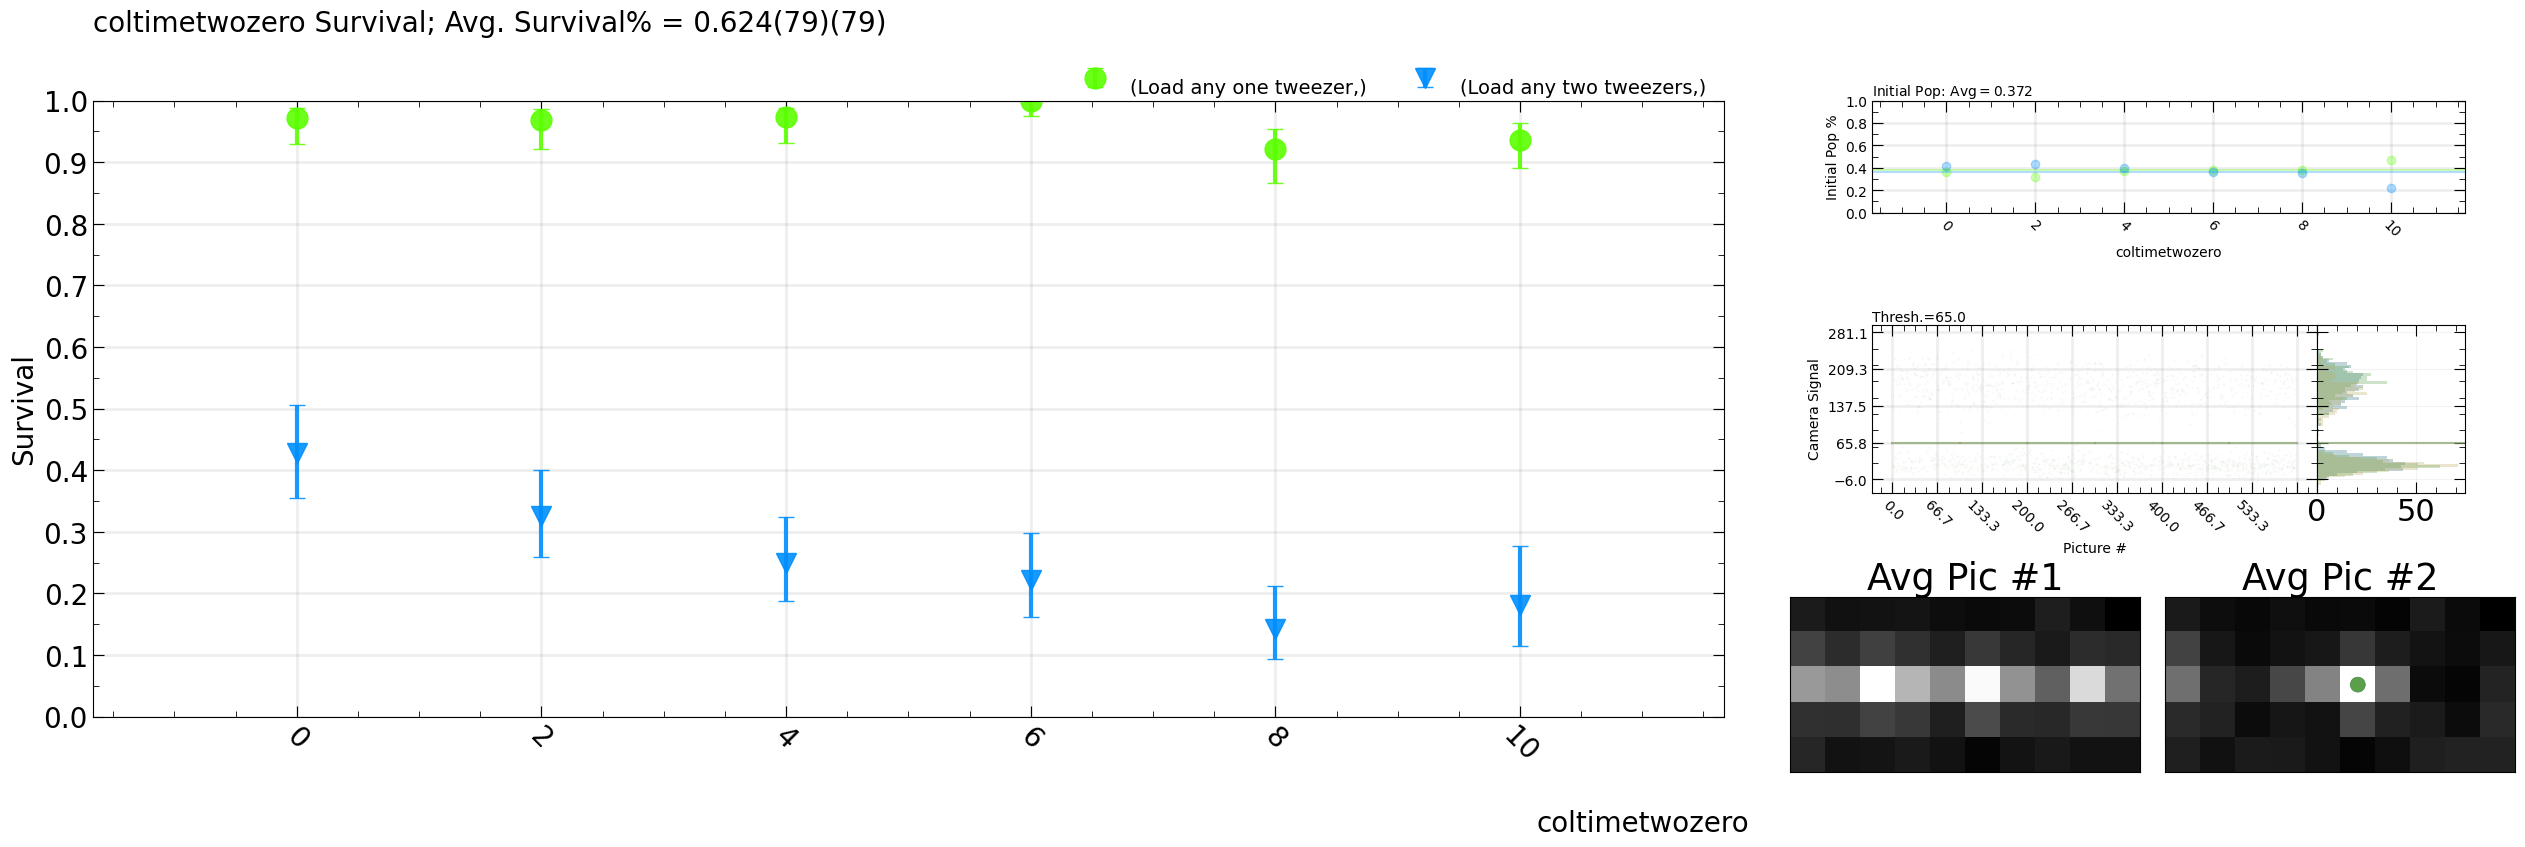

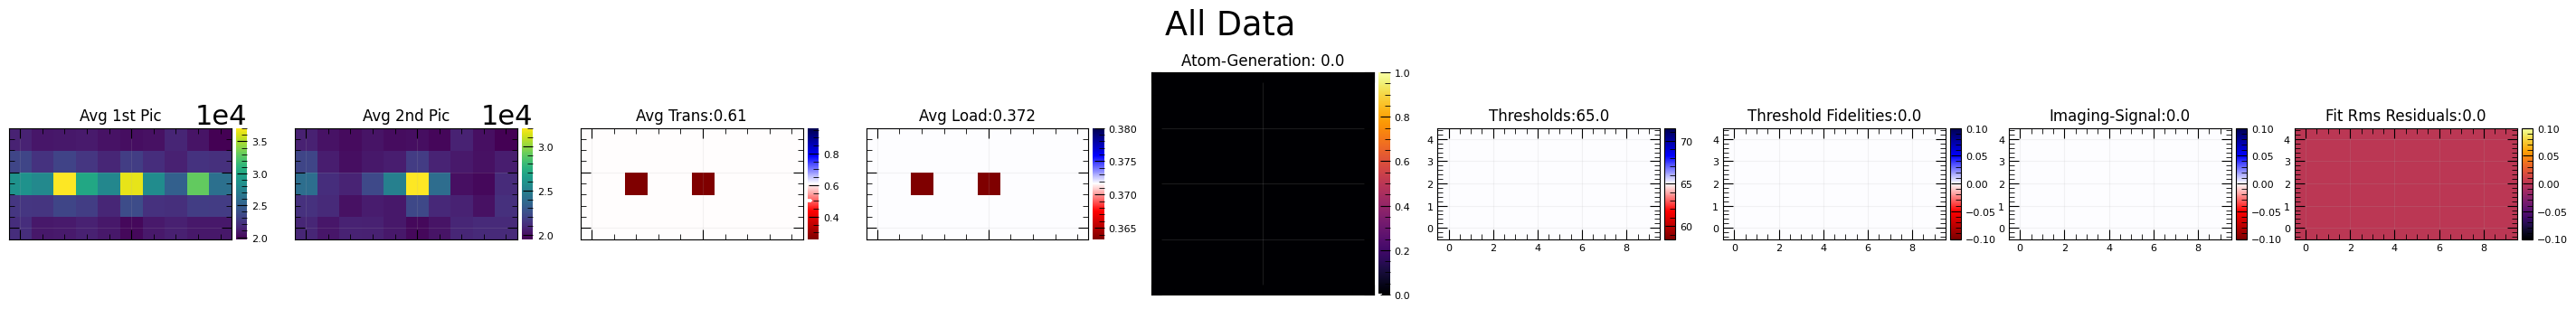

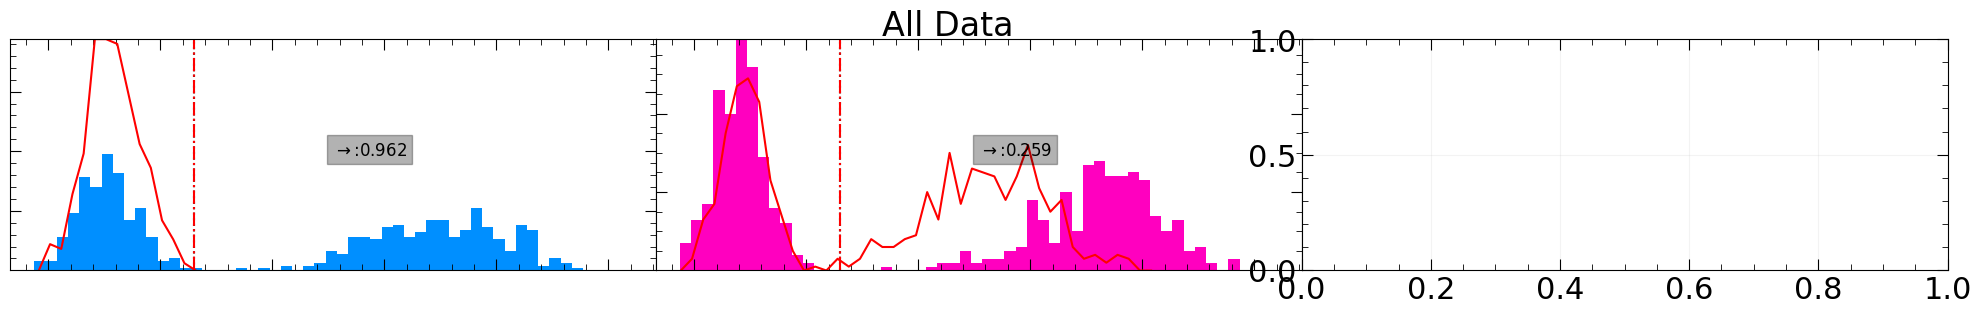

In [86]:
mp.Transfer(30, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 65)]);

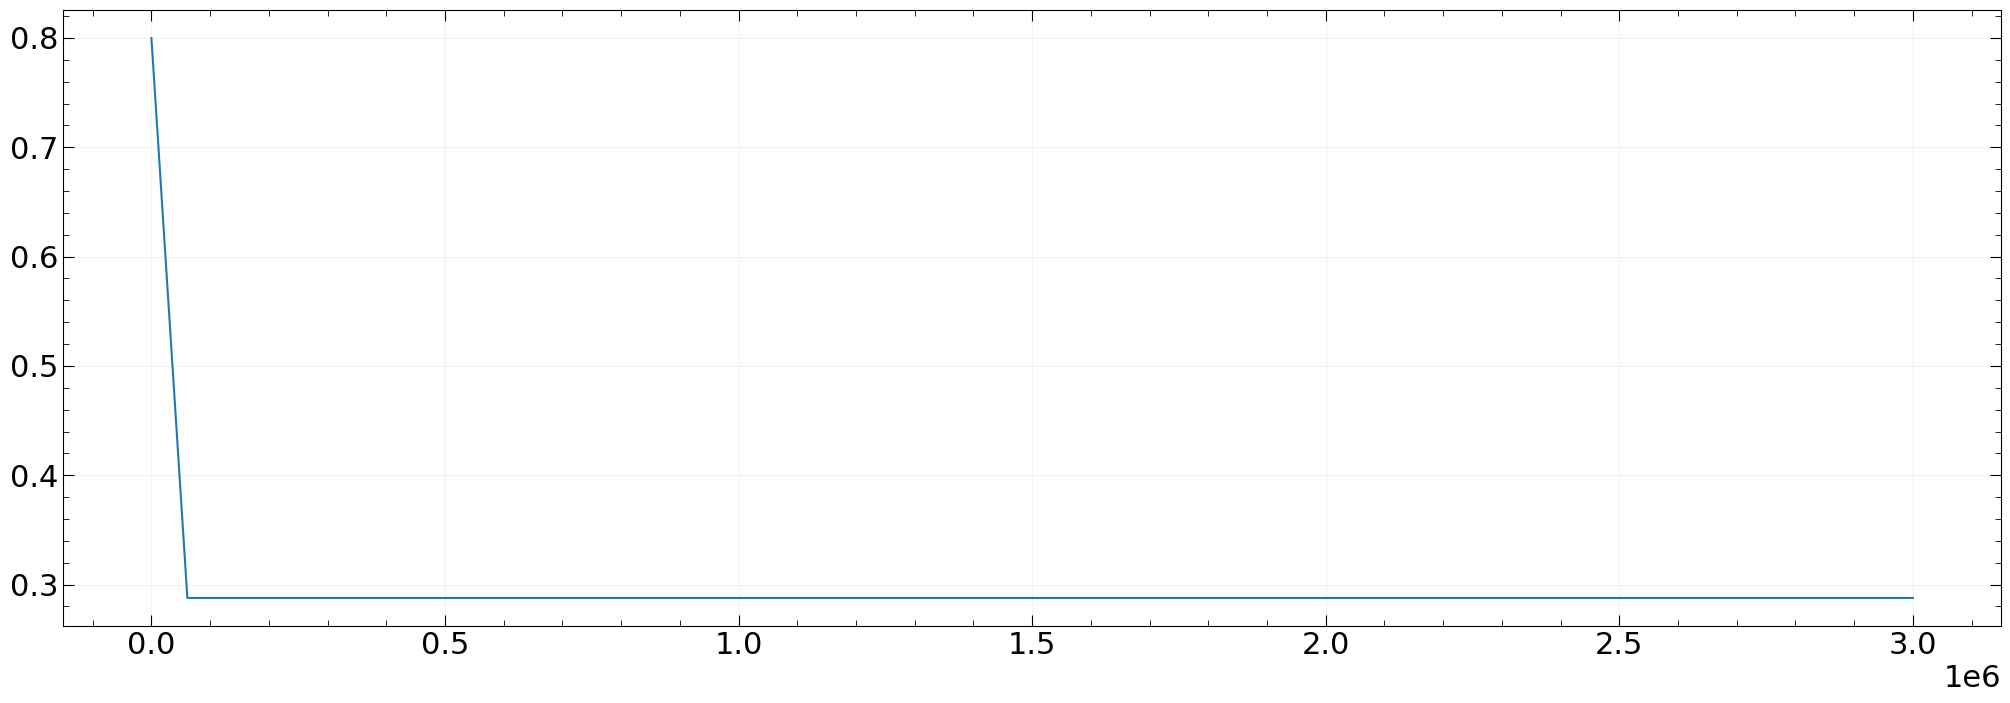

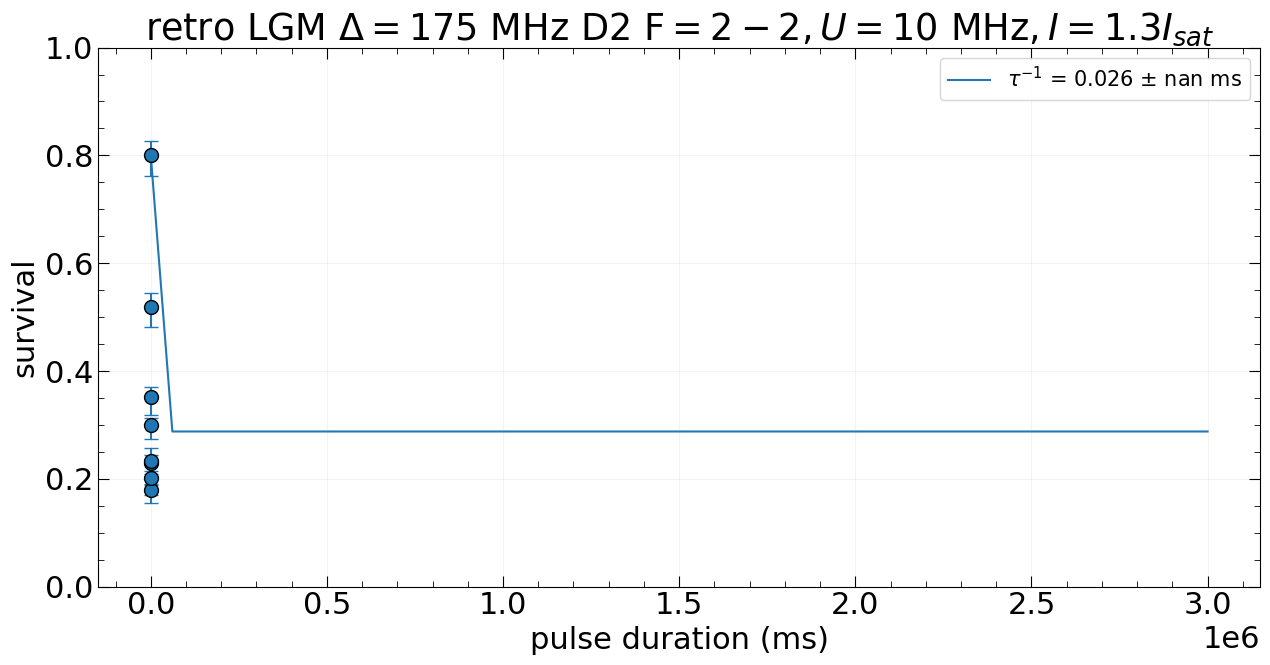

In [98]:
reloadMyModules(8)

fileId = 22
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[3] = 0.3
num_points = 50
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0=0.5e-3, T0=30e-6,alpha_guess=135e-6,num_points = num_points,plot_alpha=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 

fig,ax = plt.subplots(1, figsize=[15,7])
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


# ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
#             markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0=.5e-3, T0=30e-6,alpha_guess=135e-6,num_points = num_points,plot_alpha=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro LGM $ \Delta = 175 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

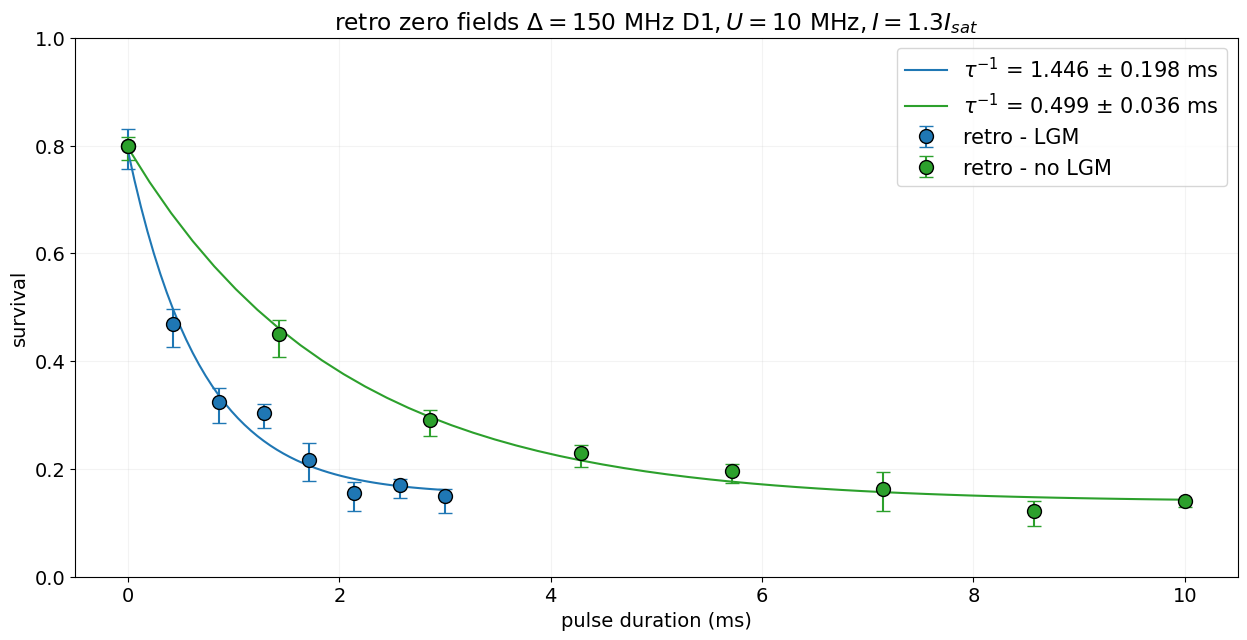

In [159]:
reloadMyModules(8)
reload(lac)

threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(22, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[6] = 0.17
load_two_y[7] = 0.15

x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(12, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y2[0] = 0.8
load_two_y2[1] = 0.45
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit2,y_fit2,unc2 = lac.decay_fit(x_data2,load_two_y2,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'retro - LGM')


ax.errorbar(x_data2,load_two_y2, yerr=load_two_err2,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'retro - no LGM')
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False,color=color1)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'retro zero fields $ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = uncb

In [164]:
lac.betaCalc(decay_constant2,.75e-3,15e-6,unc2,1e-6,1e-6)

(9.865267688497303e-12, 7.05784605259963e-13)

<Figure size 30000x9600 with 0 Axes>

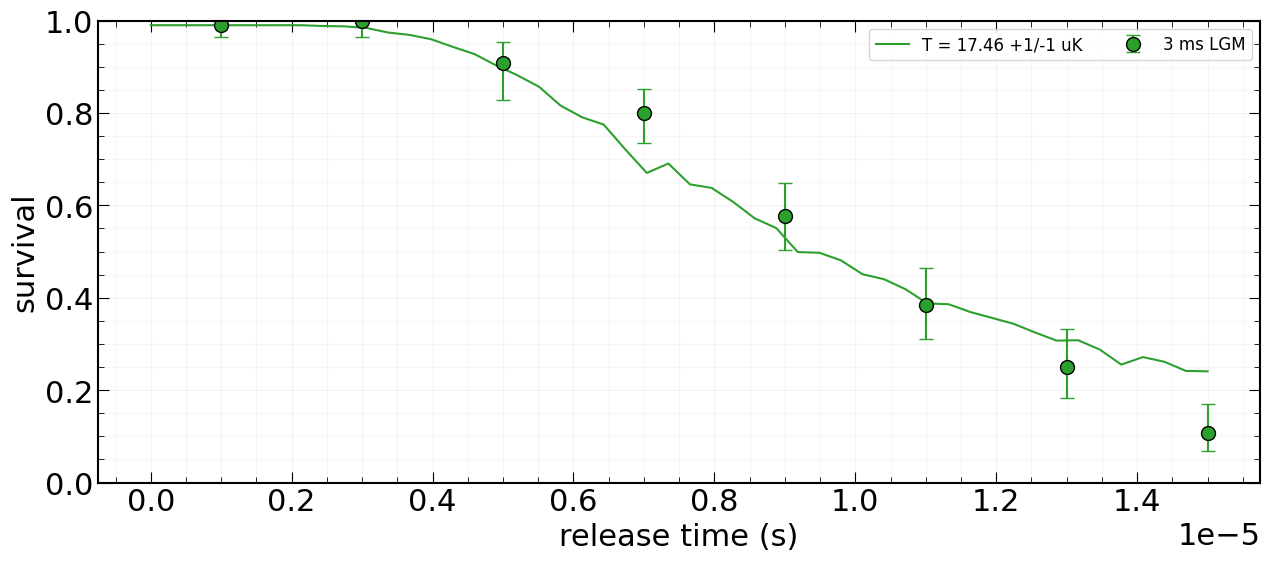

In [105]:
threshold = 60

dataset1 = ta.standardTransferAnalysis(23, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(6, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(0,max(key1),100)
temp_guess = 30e-6
trap_depth = .5e-3
avgTferData1[0]=.99
# avgTferData1[3]=.45
# avgTferData1[5]=.2
avgTferData2[0]=.99

# ax.errorbar(key1*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',
#             markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='zero fields with pulse')

# ah.releaseRecaptureTemp(key2,avgTferData2,err2,tempGuess=temp_guess,
#                         trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',
            markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='3 ms LGM')
ah.releaseRecaptureTemp(key1,avgTferData1,err1,tempGuess=temp_guess,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)



ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="x")

## December 11th data

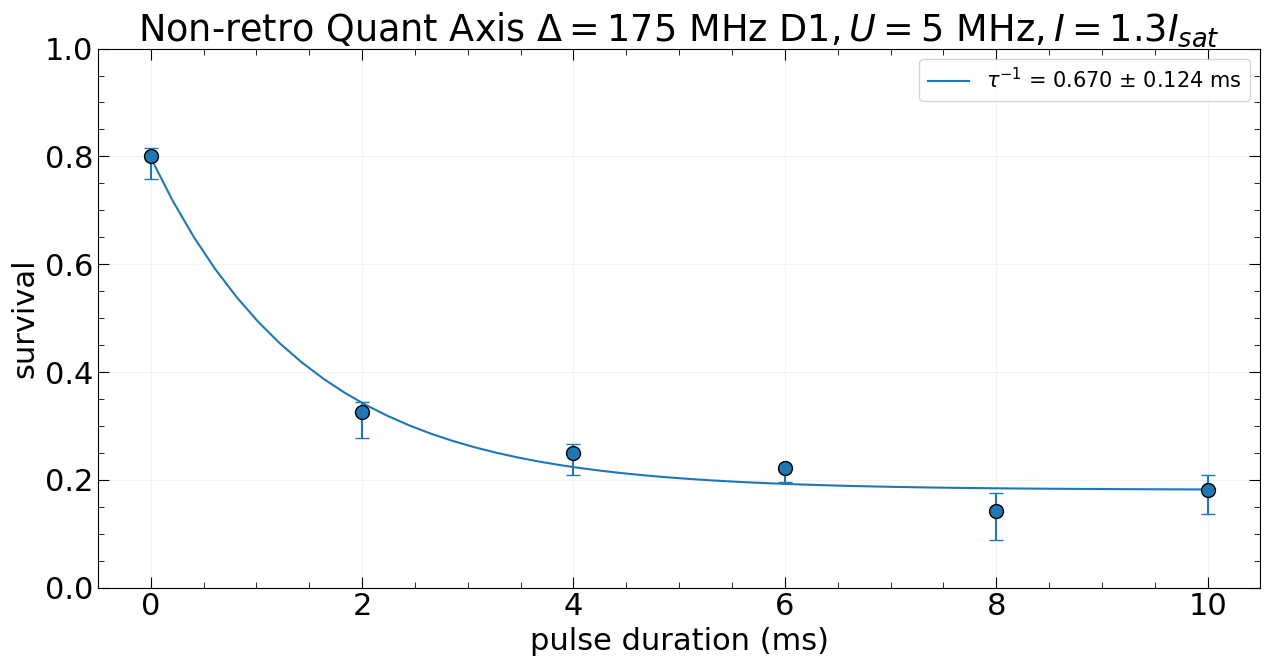

In [40]:
reloadMyModules(11)

fileId = 17
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[1] = 0.45
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


# ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
#             markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'Non-retro Quant Axis $ \Delta = 175 \ \mathrm{MHz} \ \mathrm{D1}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc

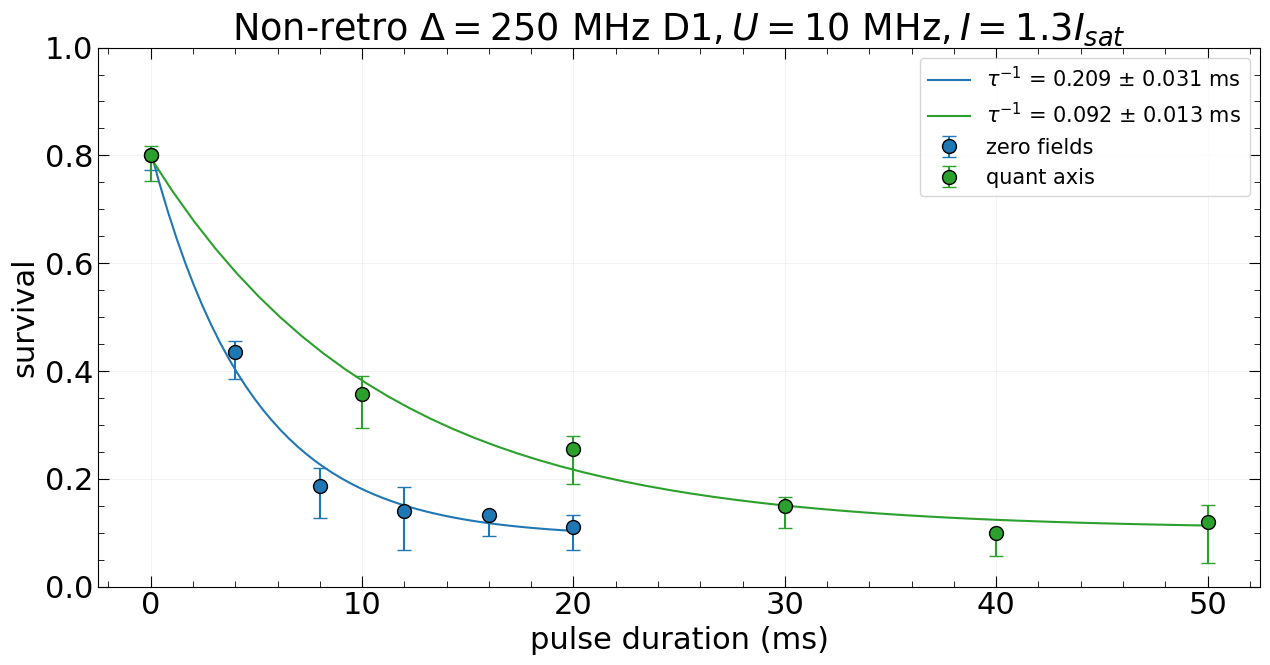

In [72]:
reloadMyModules(11)
reload(lac)

fileId = 22
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(24, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y2[0] = 0.8
load_two_y2[3] = 0.15
load_two_y2[5] = 0.12
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit2,y_fit2,unc2 = lac.decay_fit(x_data2,load_two_y2,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'zero fields')


ax.errorbar(x_data2,load_two_y2, yerr=load_two_err2,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'quant axis')
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False,color=color1)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'Non-retro $ \Delta = 250 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc

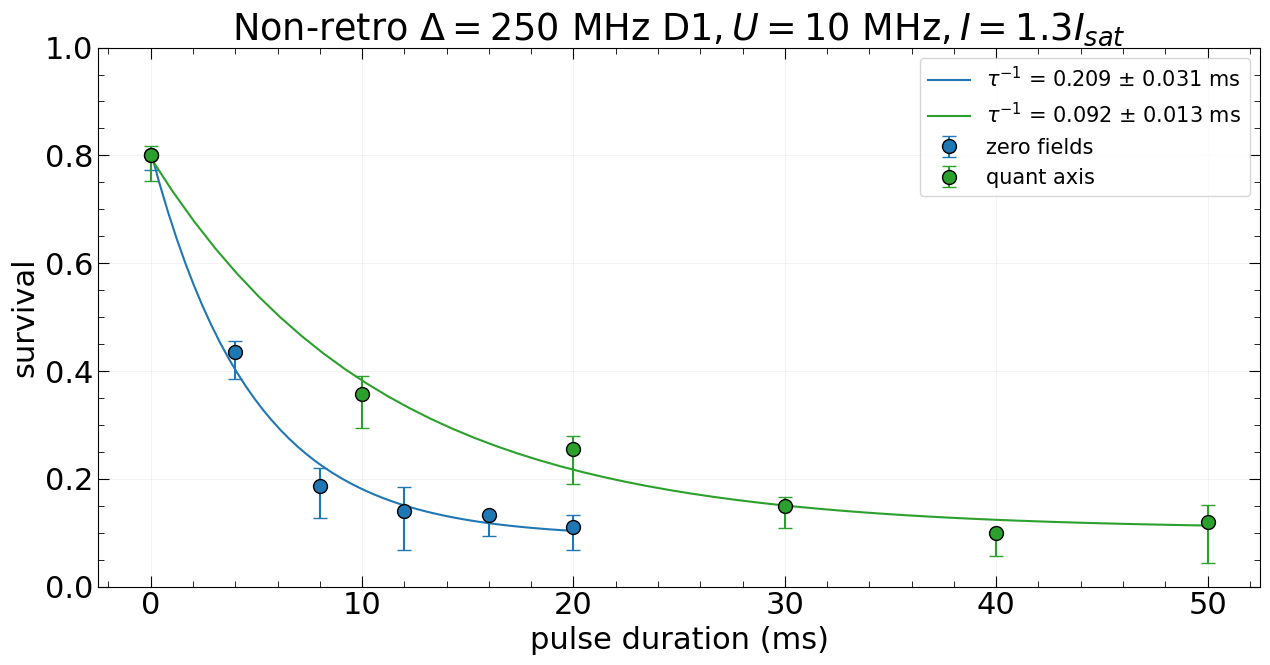

In [73]:
reloadMyModules(11)
reload(lac)

fileId = 22
threshold = 60
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(24, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y2[0] = 0.8
load_two_y2[3] = 0.15
load_two_y2[5] = 0.12
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit2,y_fit2,unc2 = lac.decay_fit(x_data2,load_two_y2,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'zero fields')


ax.errorbar(x_data2,load_two_y2, yerr=load_two_err2,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'quant axis')
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False,color=color1)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'Non-retro $ \Delta = 250 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc

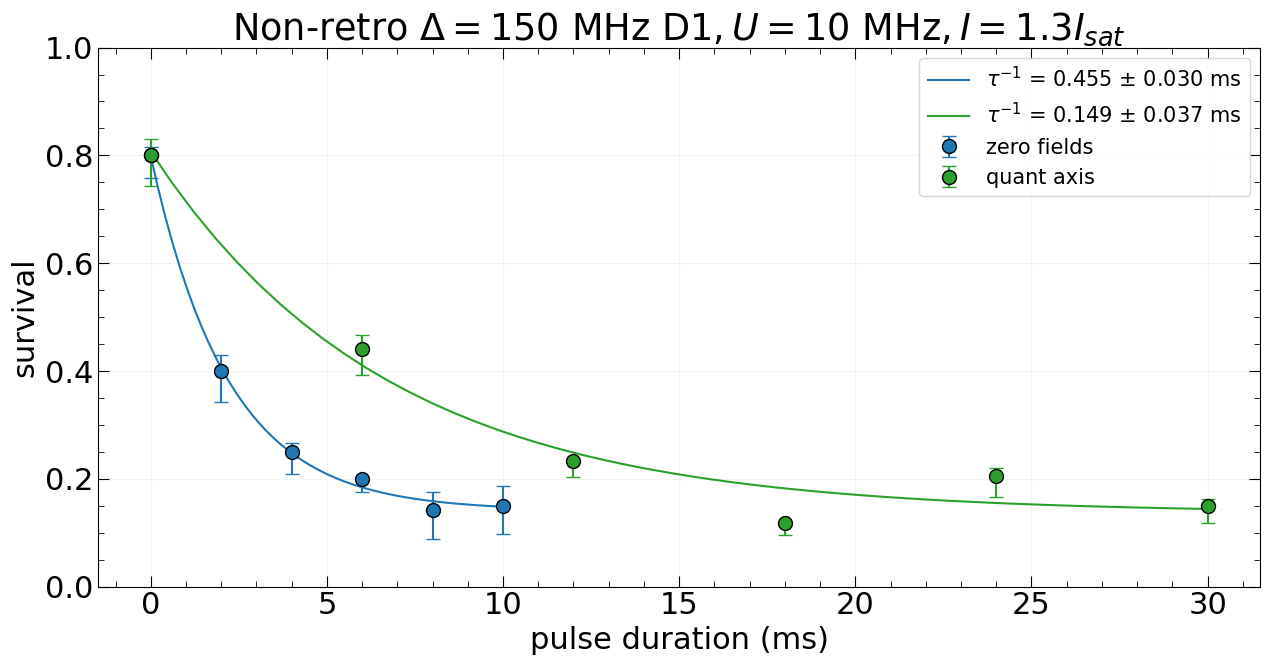

In [131]:
reloadMyModules(11)
reload(lac)

threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(30, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[1] = 0.4
load_two_y[5] = 0.15

x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(27, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y2[0] = 0.8
load_two_y2[5] = 0.15
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit2,y_fit2,unc2 = lac.decay_fit(x_data2,load_two_y2,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'zero fields')


ax.errorbar(x_data2,load_two_y2, yerr=load_two_err2,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'quant axis')
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False,color=color1)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'Non-retro $ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc

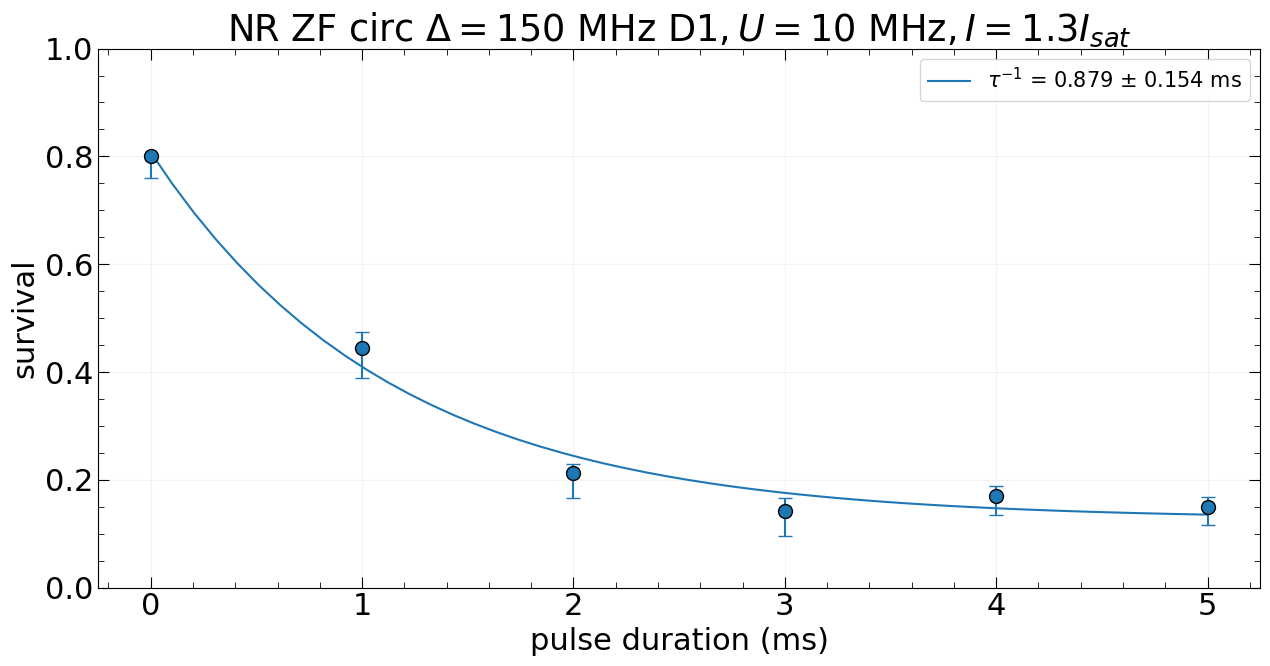

In [140]:
reloadMyModules(11)

fileId = 33
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[4] = 0.17
load_two_y[5] = 0.15
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


# ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
#             markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'NR ZF circ $ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc

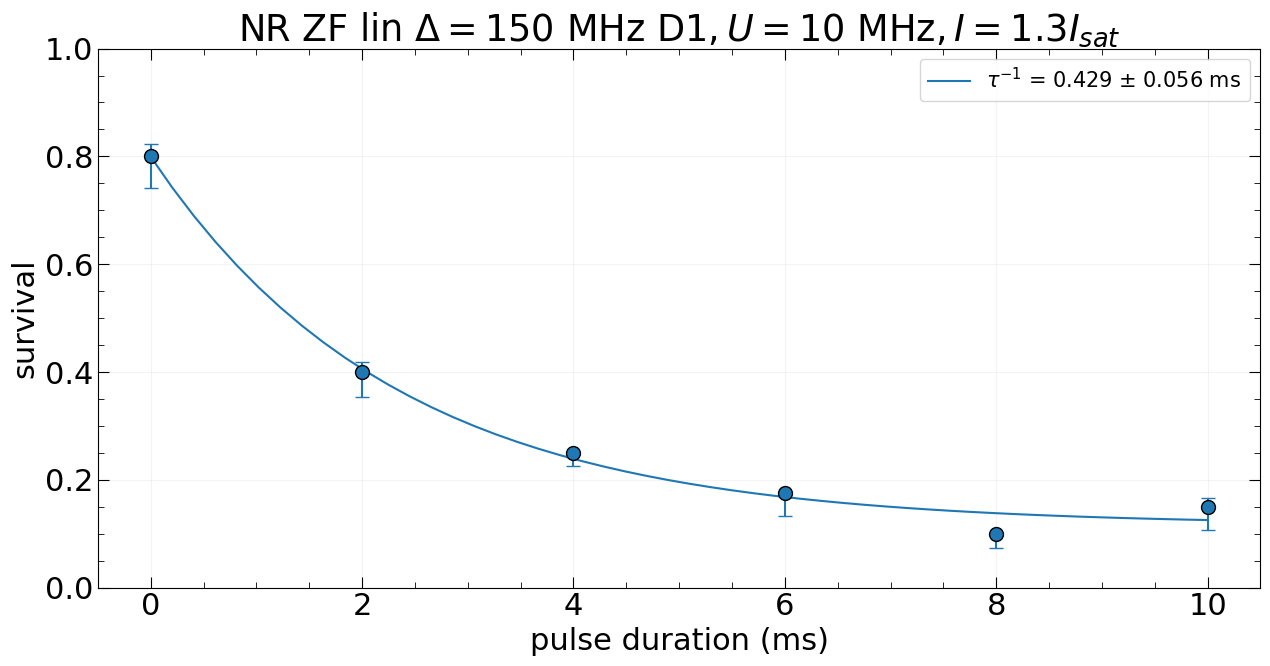

In [136]:
reloadMyModules(11)

fileId = 36
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[1] = 0.4
load_two_y[5] = 0.15
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


# ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
#             markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'NR ZF lin $ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc

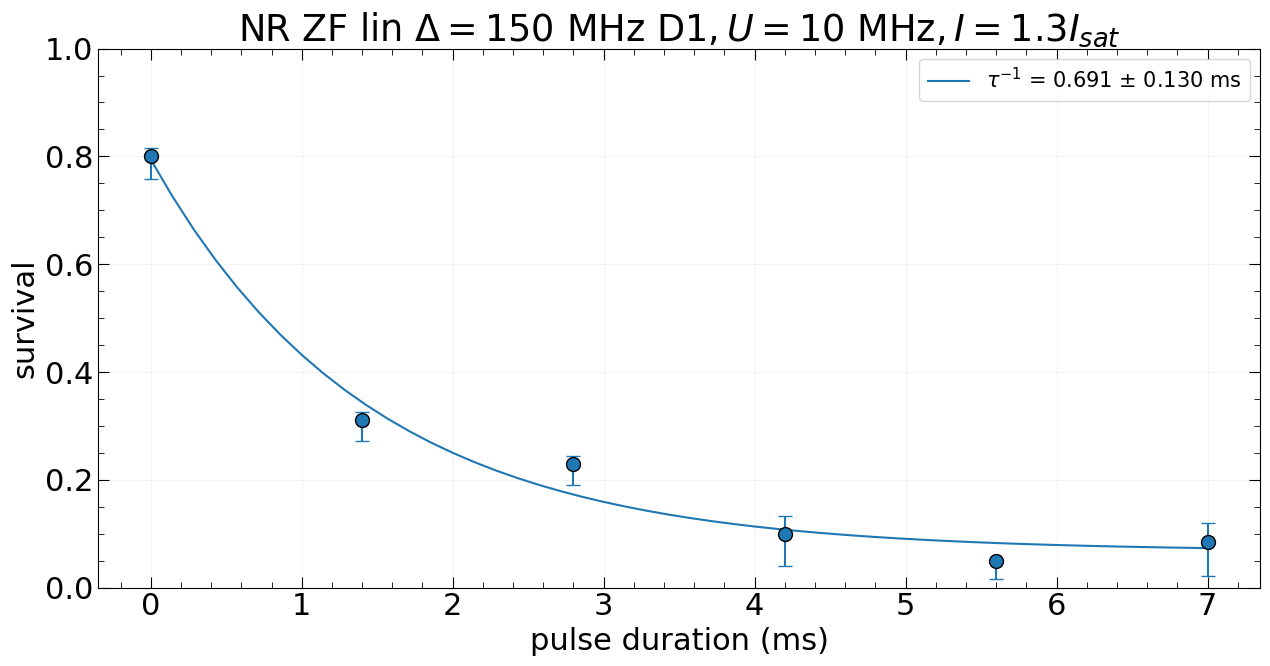

In [146]:
reloadMyModules(11)

fileId = 38
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[1] = 0.4
# load_two_y[5] = 0.15
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


# ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
#             markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'NR ZF lin $ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc

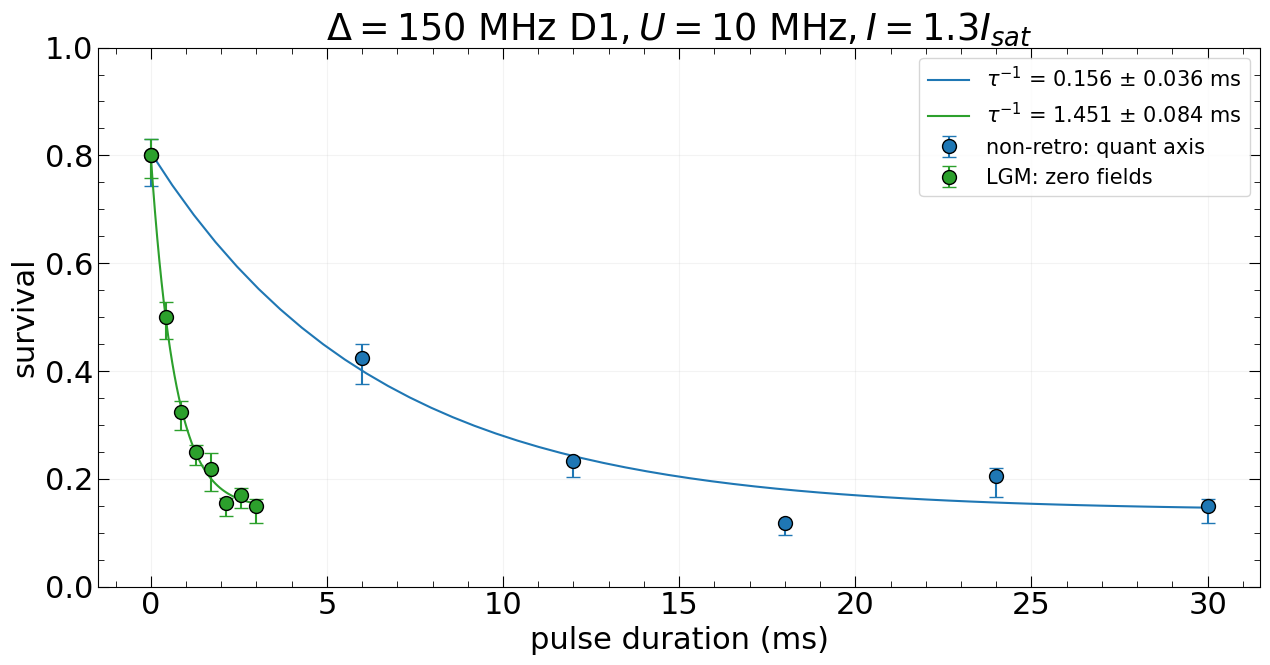

In [152]:
reloadMyModules(11)
reload(lac)

threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(27, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[5] = 0.15

reloadMyModules(8)
x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(22, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y2[0] = 0.8
load_two_y2[3] = 0.25
load_two_y2[6] = 0.17
load_two_y2[7] = 0.15
num_points = 50
U0=.25e-3
T0=20e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit2,y_fit2,unc2 = lac.decay_fit(x_data2,load_two_y2,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'non-retro: quant axis')


ax.errorbar(x_data2,load_two_y2, yerr=load_two_err2,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'LGM: zero fields')
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
alpha2, decay_constant2 = lac.beta_fit_guess(x_data2*1e-6,load_one_y2,load_two_y2, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False,color=color1)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

betaPrime_b250_5MHz = decay_constant
betaPrime_unc_b250_5MHz = unc